<a href="https://colab.research.google.com/github/AshStringer/FDSFE_AStringer/blob/main/HW8/Instructions_NN101_MNISTprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# how many labels are available?
y_train.shape

(60000,)

In [4]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

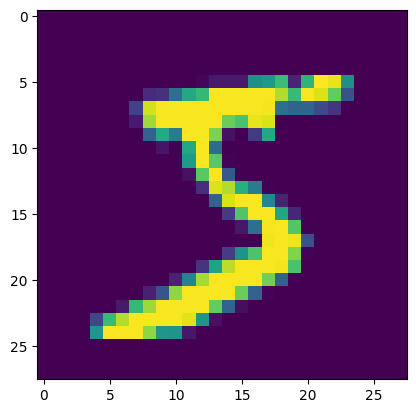

In [5]:
# show the first input data object

plt.imshow(x_train[0])

In [6]:
# check how many possible values are in the target variable
import numpy
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# check what is the minimum and maximum value and data type of the features dataset
x_train.min(), x_train.max(), x_train.dtype

(0, 255, dtype('uint8'))

In [9]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling) and that the values are floating point objects
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

In [11]:
#the number of pixels in the data is
28*28

784

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [12]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

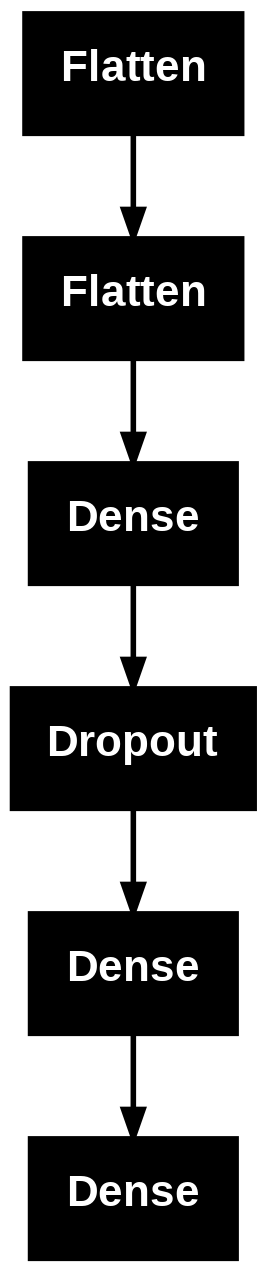

In [13]:
tf.keras.utils.plot_model(model)

In [14]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [16]:
#train the model (did you make sure you are using GPUs??)
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1650 - loss: 0.4702 - val_accuracy: 0.1733 - val_loss: 0.6977
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1648 - loss: 0.4798 - val_accuracy: 0.1780 - val_loss: 0.6645
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1671 - loss: 0.4663 - val_accuracy: 0.1760 - val_loss: 0.6712
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1674 - loss: 0.4829 - val_accuracy: 0.1692 - val_loss: 0.6723
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1682 - loss: 0.4737 - val_accuracy: 0.1770 - val_loss: 0.7018


the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

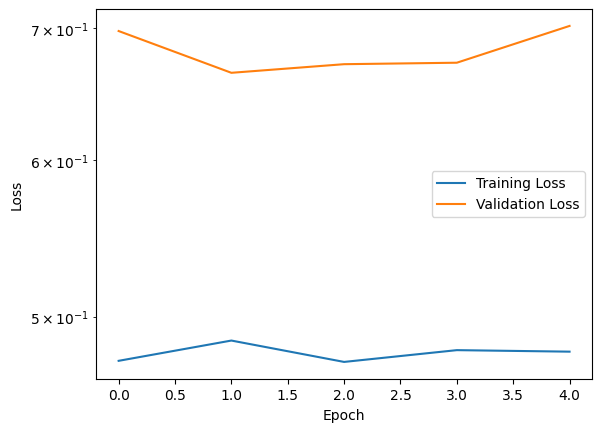

In [17]:
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log') #use log scale for the y axis
plt.legend()
plt.show()


This model is overfitting because the Training Loss is decreasing while the Validation Loss is increasing. It is shown here because of the huge growing gap. To fix this problem we could consider regularization, dropout, or stopping early.

In [ ]:
# is this model overfitting? how woudl you find out? how would you fix it?

In [18]:
#what is the accuracy of the model? use model.evaluat to assess it

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.7310
Test Accuracy: 0.1851


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Data point 1:
  Actual label: 7
  Predicted value: 6.825272083282471


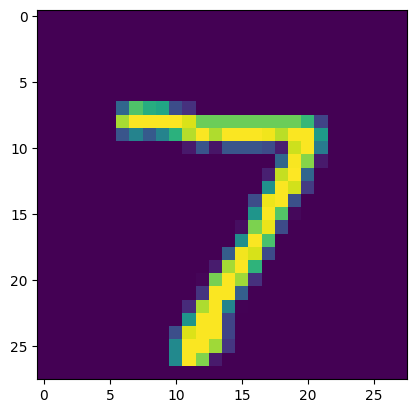

Data point 2:
  Actual label: 2
  Predicted value: 1.992439866065979


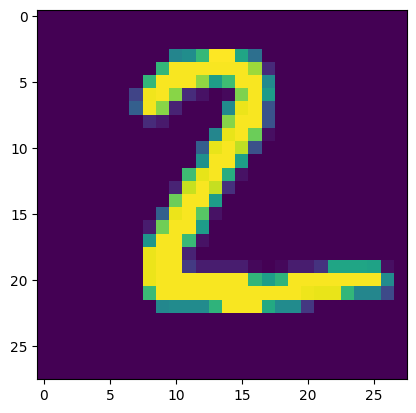

Data point 3:
  Actual label: 1
  Predicted value: 0.9715808629989624


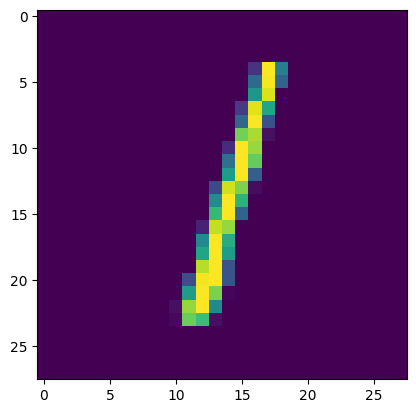

Data point 4:
  Actual label: 0
  Predicted value: 0.18231439590454102


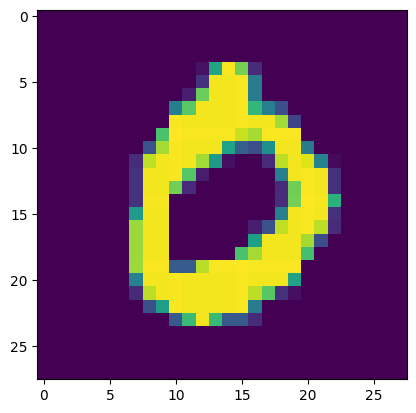

Data point 5:
  Actual label: 4
  Predicted value: 4.468565464019775


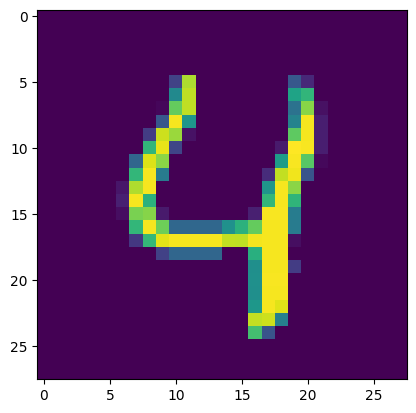

In [19]:
# show the first 5 data points and corresponding predictions

predictions = model.predict(x_test[:5])

for i in range(5):
  print(f"Data point {i+1}:")
  print(f"  Actual label: {y_test[i]}")
  print(f"  Predicted value: {predictions[i][0]}")
  plt.imshow(x_test[i])
  plt.show()

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [29]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
prob_model.add(tf.keras.layers.Reshape((784,), input_shape=(28, 28)))
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))
# add 1 dropout layers dropping 20% of the connections
prob_model.add(tf.keras.layers.Dropout(0.2))
# add 1 dense layer at the end, how many neurons?
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))
prob_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

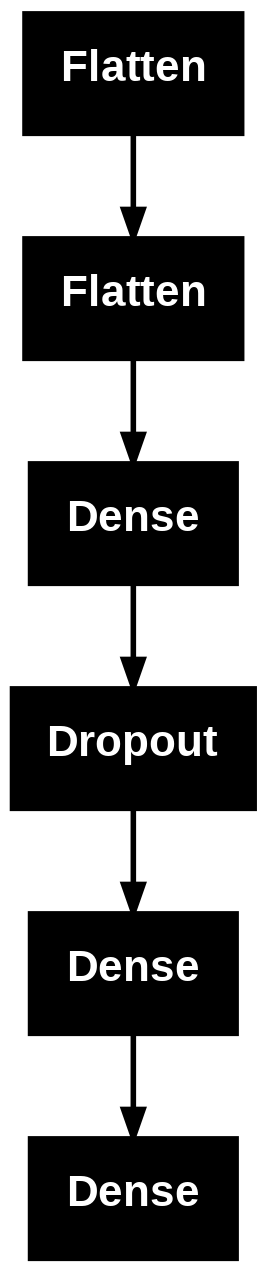

In [30]:
tf.keras.utils.plot_model(model)

In [31]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'
prob_model.compile(optimizer = optimizer, loss = loss,
              metrics=['accuracy'])
prob_training_history = prob_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8248 - loss: 0.5897 - val_accuracy: 0.9504 - val_loss: 0.1798
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9471 - loss: 0.1823 - val_accuracy: 0.9621 - val_loss: 0.1297
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9580 - loss: 0.1374 - val_accuracy: 0.9689 - val_loss: 0.1095
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9682 - loss: 0.1048 - val_accuracy: 0.9718 - val_loss: 0.0966
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9728 - loss: 0.0892 - val_accuracy: 0.9733 - val_loss: 0.0892
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9784 - loss: 0.0722 - val_accuracy: 0.9758 - val_loss: 0.0817
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9795 - loss: 0.0633 - val_accuracy: 0.9752 - val_loss: 0.0816
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9831 - loss: 0.0527 - 

In [48]:
#what is the accuracy of the model? use model.evaluat to assess it
x_test = x_test.reshape(-1, 28, 28)

loss, accuracy = prob_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0866
Test Accuracy: 0.9760


In [49]:
_# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


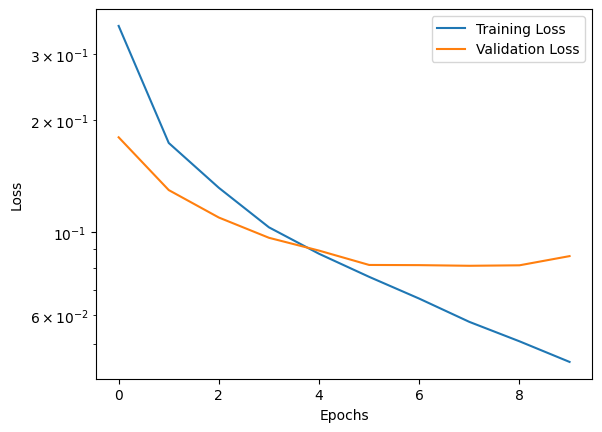

In [50]:
#show the loss curves and comment
plt.plot(prob_training_history.history['loss'], label='Training Loss')
plt.plot(prob_training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log') #use log scale for the y axis
plt.legend()
plt.show()

# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

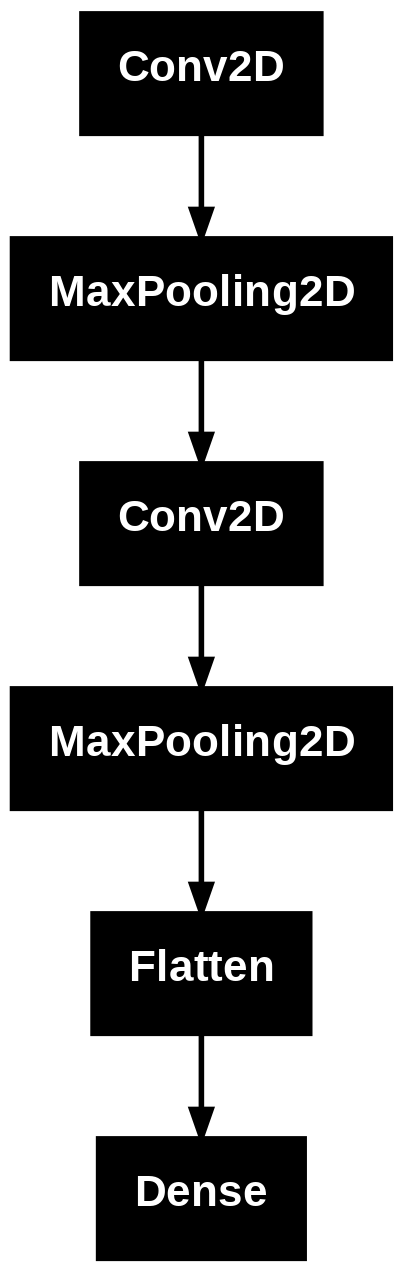

In [51]:

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

cnn_model.summary()
tf.keras.utils.plot_model(cnn_model)



In [52]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_training_history = cnn_model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8487 - loss: 0.5017 - val_accuracy: 0.9742 - val_loss: 0.0871
Epoch 2/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9762 - loss: 0.0767 - val_accuracy: 0.9805 - val_loss: 0.0652
Epoch 3/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9812 - val_loss: 0.0653
Epoch 4/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9820 - val_loss: 0.0548
Epoch 5/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9823 - val_loss: 0.0612
Epoch 6/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9792 - val_loss: 0.0785
Epoch 7/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9854 - val_loss: 0.0536
Epoch 8/10
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9957 - loss: 0.0138 - 

In [53]:
#what is the accuracy of the model? use model.evaluat to assess it

loss, accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0446
Test Accuracy: 0.9889


In [42]:
# show the first 10 data points and corresponding predictions
reshaped_data = x_test[:10].reshape(-1, 28, 28, 1)

result = cnn_model.predict(reshaped_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


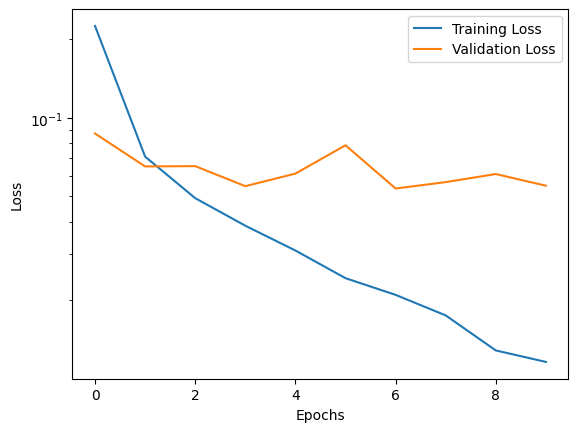

In [54]:
#show the loss curves and comment
plt.plot(cnn_training_history.history['loss'], label='Training Loss')
plt.plot(cnn_training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()
